In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Загрузим наш датасет

In [3]:
df = pd.read_csv("megafon.csv")
df.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


Посмотрим на пропущенные значения

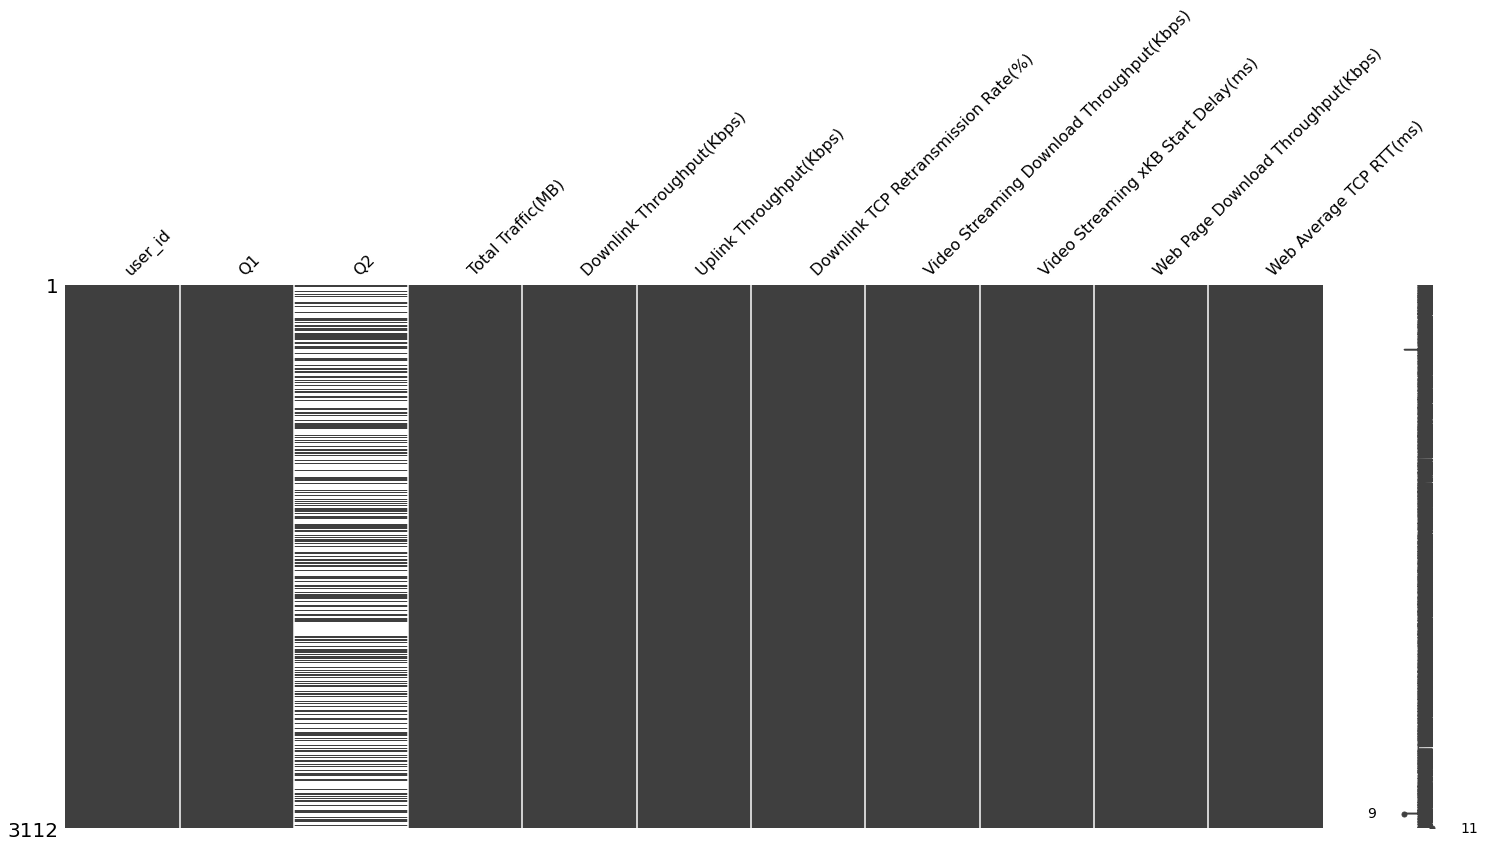

In [4]:
msno.matrix(df)
plt.show()

В столбце, отвечающем за второй вопрос, оказалось довольно много пропущенных значений. <br>
Посмотрим на них в числах.

In [5]:
df.isna().sum()

user_id                                         0
Q1                                              2
Q2                                           1797
Total Traffic(MB)                               0
Downlink Throughput(Kbps)                       0
Uplink Throughput(Kbps)                         0
Downlink TCP Retransmission Rate(%)             0
Video Streaming Download Throughput(Kbps)       0
Video Streaming xKB Start Delay(ms)             0
Web Page Download Throughput(Kbps)              0
Web Average TCP RTT(ms)                         0
dtype: int64

Видно, что на второй вопрос согласились отвечать чуть более половины абонентов, прошедших опрос. Также двое человек, похоже, отказались проходить опрос или намеренно испортили ответ. Они нам в исследовании не помогут, их рассматривать не будем.

In [6]:
df.dropna(axis=0, subset=["Q1"], inplace=True)

Теперь посмотрим уникальные значения столбца общей удовлетворённости абонентов связью:

In [7]:
df.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном совсем

Как видно, некоторые абоненты заполнили неправильно или пытались дать 2 ответа!

В том случае, если абонент заполнил 2 оценки и обе из них не превышают 10 - возьмём среднюю и округлим до целых чисел, если оценка одна и выше 10 - исправим на 10. Также наша шкала начинается с оценки 1, поэтому заменим нули, которые поставили пользователи на единицы. Остальные значения придётся чистить вручную.

In [8]:
def correct_dataframe(string):
    new_list = str(string).split(", ")   # пытаемся разбить данные
    
    if string.isdigit() and int(string) > 10:
        new_value = "10"
        
    elif string == '0':
        new_value = '1'
    
    elif min([i.isdigit() for i in new_list]) != 0:
        if [int(i) <= 10 for i in new_list]:
            new_list = [int(i) for i in new_list]
            new_value = round(np.mean(new_list))
            new_value = str(new_value)
        
    else:
        new_value = string    # оставляем без изменений
    
    return new_value

In [9]:
values = list(df.Q1.copy())
new_values = [correct_dataframe(value) for value in values]
df.Q1 = new_values
df.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю', '30',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '44515540706', 'Без з',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном совсем'],
      dtype=object)

Проведём ручную коррекцию некоторых значений

In [10]:
df.loc[df.Q1 == "3 - дер.Ширяево Волоколамского района, 9 - в Москве", 'Q1'] = '6'
df.loc[df.Q1 == 'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !', "Q1"] = '10'
df.loc[df.Q1 == 'ОЦЕНКА-3/НЕВАЖНО/', 'Q1'] = "3"
df.loc[df.Q1 == 'Отвратительно', "Q1"] = "1"
df.loc[df.Q1 == '4. Тульская область Заокский район. Романовские дачи связи почти нет', 'Q1'] = "4"
df.loc[df.Q1 == 'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', 'Q1'] = "8"
df.loc[df.Q1 == 'Поохое', 'Q1'] = "3"
df.loc[df.Q1 == 'Когда в Москве-10 а когда в калужской области в деревне Бели-1', 'Q1'] = "5"
df.loc[df.Q1 == 'Ужасно', 'Q1'] = '1'
df.loc[df.Q1 == '3 тройка, связь отвратительная, жалко платить за такой тарив', 'Q1'] = "3"

In [11]:
df.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '6', '***** ** ***',
       'Я ценой услуг не удовлетворен', 'Пока не понял', 'Hi',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю', '30',
       '?', 'Нет', 'Да', 'Чдтчдтччдтччч', '44515540706', 'Без з',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном совсем'],
      dtype=object)

In [12]:
values = [str(i) for i in range(1, 11)]
raw_data = df.Q1.copy()
new_data = []
for element in raw_data:
    if element not in values:
        element = np.NaN
    new_data.append(element)
df.Q1 = new_data
df.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '6', nan],
      dtype=object)

Напоследок, избавимся от невалидных данных:

In [13]:
df.dropna(axis=0, subset=["Q1"], inplace=True)

Данные почищенны, теперь давайте посмотрим распределение данных:

In [14]:
df.Q1.value_counts()

10    851
1     544
3     328
8     293
9     238
5     236
7     200
2     171
4     127
6     107
Name: Q1, dtype: int64

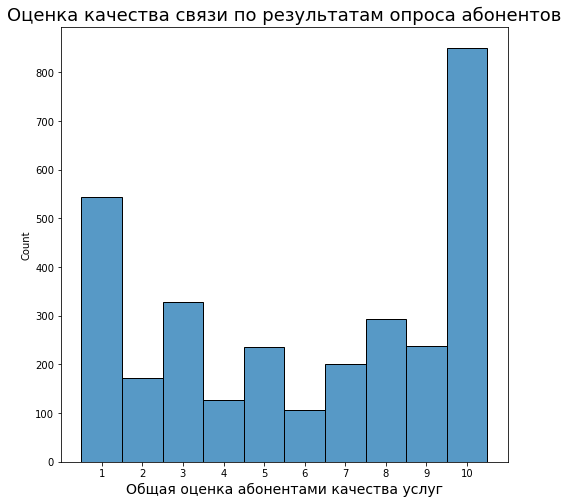

In [15]:
df.Q1 = df.Q1.astype(int)

plt.figure(figsize=(8, 8))
plt.title("Оценка качества связи по результатам опроса абонентов", fontsize=18)
sns.histplot(data=df, x=df.Q1, bins=10, discrete=True)
plt.xticks(range(1, 11))
plt.xlabel("Общая оценка абонентами качества услуг", fontsize=14)
plt.show()

#### Посмотрим технические показатели, в зависимости от оценки абонента:

Скорость выгрузки:

In [16]:
df.groupby("Q1")["Uplink Throughput(Kbps)"].describe()

,count,mean,std,min,25%,50%,75%,max
Q1,,,,,,,,
1,544.0,145.875901,150.026617,6.11,60.4575,107.455,178.4000,1663.61
2,171.0,142.177427,118.284335,13.75,64.3750,107.110,185.6500,825.62
3,328.0,165.747561,154.316652,11.03,67.5725,123.065,209.4150,1250.42
4,127.0,179.503465,221.706674,8.30,69.8150,109.700,213.0500,1612.84
5,236.0,160.630805,127.920071,22.85,76.1700,122.360,212.7800,908.11
6,107.0,182.046729,151.785507,34.71,78.1100,149.040,234.0400,1087.54
7,200.0,172.334400,243.620299,13.97,80.1325,116.605,202.7475,3116.72
8,293.0,190.202594,281.016053,14.82,73.4900,125.070,220.7000,3695.47
9,238.0,189.935714,263.456604,12.27,70.2775,126.910,233.5550,3283.33


С ростом оценки абонента, средняя и медианная скорости выгрузки также возрастают.

Скорость загрузки:

In [17]:
df.groupby("Q1")["Downlink Throughput(Kbps)"].describe()

,count,mean,std,min,25%,50%,75%,max
Q1,,,,,,,,
1,544.0,2021.681563,2929.906679,13.26,516.7925,1156.110,2501.6950,39817.64
2,171.0,1776.337778,3090.687795,65.56,449.9350,1092.030,2315.5150,36446.00
3,328.0,1765.123811,1851.449275,14.23,558.7275,1140.490,2317.0875,12471.64
4,127.0,2209.035433,2461.277901,129.68,534.7250,1481.070,2713.7050,13188.11
5,236.0,2101.227119,2491.403637,102.05,650.8825,1273.570,2654.7725,19112.75
6,107.0,2582.478224,2889.122818,124.01,883.3400,1831.330,3164.2450,18288.32
7,200.0,2137.627300,2100.836966,125.97,662.2800,1410.815,2951.9225,13636.42
8,293.0,2258.164300,2191.588231,62.98,726.9900,1452.710,2964.3400,12084.75
9,238.0,2684.549244,3418.498155,28.33,777.8225,1653.080,2996.8500,30820.00


С ростом оценки средняя скорость загрузки не претерпевает однозначных изменений, а медианная в целом возрастает. Данный показатель качества связи не имеет большого влияния на оценку.

Процент потери пакетов данных:

In [18]:
df.groupby("Q1")["Downlink TCP Retransmission Rate(%)"].describe()

,count,mean,std,min,25%,50%,75%,max
Q1,,,,,,,,
1,544.0,2.178750,2.981805,0.11,0.8375,1.425,2.4700,31.20
2,171.0,2.125789,2.136466,0.06,0.8400,1.640,2.6050,17.25
3,328.0,1.929146,1.783268,0.10,0.8375,1.460,2.4725,19.17
4,127.0,2.061496,2.730334,0.12,0.6850,1.310,2.0250,16.73
5,236.0,1.796737,1.697892,0.09,0.6650,1.285,2.2825,11.98
6,107.0,1.587196,1.221440,0.11,0.7100,1.160,2.2100,6.09
7,200.0,1.747100,1.472377,0.09,0.7675,1.450,2.2475,10.23
8,293.0,1.711195,1.640431,0.07,0.6800,1.210,2.0500,10.26
9,238.0,1.537185,1.634236,0.07,0.6100,1.090,1.8575,16.68


С ростом оценки % повторной отправки пакетов падает, повышая "эффективный" трафик.

Скорость потокового просмотра видео:

In [19]:
df.groupby("Q1")["Video Streaming Download Throughput(Kbps)"].describe()

,count,mean,std,min,25%,50%,75%,max
Q1,,,,,,,,
1,544.0,4883.543511,4915.053125,69.82,1715.1900,3614.130,6304.4950,58566.03
2,171.0,5819.666257,6001.933138,65.75,2145.9350,4193.800,7953.0950,45678.29
3,328.0,4694.604573,4313.988697,87.34,1797.0650,3710.500,6180.1950,36755.53
4,127.0,5058.923465,4512.251389,326.41,1984.7800,3737.550,6353.2400,21384.86
5,236.0,5802.380678,5919.528748,229.37,2075.3525,3857.495,7519.8500,37931.95
6,107.0,5881.250935,4352.476562,0.00,2800.0350,4872.090,7936.1900,23200.99
7,200.0,5985.788550,5289.555708,133.95,2593.6475,4420.135,7757.9350,40767.40
8,293.0,6174.560785,4657.330131,167.19,2812.5700,5049.760,8251.7400,29271.58
9,238.0,6579.093025,5946.419071,54.36,2597.6300,4974.810,8422.3275,46035.65


Для большИх значений оценки характерна бОльшая средняя и медианная скорости потокового просмотра видео.

Скорость загрузки интернет-страниц:

In [20]:
df.groupby("Q1")["Web Page Download Throughput(Kbps)"].describe()

,count,mean,std,min,25%,50%,75%,max
Q1,,,,,,,,
1,544.0,1779.203327,2022.222993,55.25,778.5575,1458.935,2152.8025,35603.97
2,171.0,2217.803626,2539.929493,20.66,997.7750,1601.760,2581.8100,24115.95
3,328.0,1889.551250,2199.297627,53.70,842.7150,1513.760,2180.8350,29715.58
4,127.0,2020.102362,2008.153657,108.45,802.4100,1557.060,2621.4800,12944.98
5,236.0,2045.159449,2140.691884,0.00,1005.0625,1563.275,2521.4600,18256.25
6,107.0,2276.704486,2318.498176,0.00,1034.6850,1743.510,2725.2350,19622.23
7,200.0,2064.868600,1498.727490,205.44,1073.2925,1765.130,2588.6975,11403.07
8,293.0,2174.675700,2024.538649,104.65,1133.8300,1769.810,2649.0200,24468.31
9,238.0,2394.859832,2107.055412,74.72,1125.8700,1856.230,2962.3475,16227.85


Не наблюдается чёткой зависимости оценки от средней скорости загрузки интернет-страниц. Медианные значения незначительно симбатно возрастают. В целом, данный показатель качества связи можно не считать важным.

Скорость обработки интернет-запроса в мс:

In [21]:
df.groupby("Q1")["Web Average TCP RTT(ms)"].describe()

,count,mean,std,min,25%,50%,75%,max
Q1,,,,,,,,
1,544.0,257.454044,393.621587,29.0,85.75,139.0,251.50,3471.0
2,171.0,197.596491,223.997021,35.0,70.50,105.0,225.50,1535.0
3,328.0,224.810976,259.569947,22.0,86.00,143.5,252.25,2178.0
4,127.0,180.992126,215.370205,35.0,75.50,112.0,197.00,1737.0
5,236.0,189.652542,233.115491,0.0,77.75,125.0,207.25,2128.0
6,107.0,194.467290,293.882190,0.0,70.00,113.0,209.00,2394.0
7,200.0,164.445000,195.159507,40.0,72.75,119.5,182.25,2178.0
8,293.0,169.703072,227.616967,36.0,75.00,108.0,174.00,2533.0
9,238.0,173.689076,252.914880,30.0,67.00,100.0,190.25,2295.0


Чем выше оценка, тем меньше среднее и медианное время обработки запроса

Далее давайте посчитаем ответы на второй вопрос. Для этого целесообразно разбить абонентов на 4 группы: <br>
1) Те, кто поставил оценки 1-3 (считающие связь плохой/bad) <br>
2) Те, кто поставил оценки 4-6 (считающие связь посредственной/average) <br>
3) Те, кто поставил оценки 7-8 (считающие в целом связь хорошей/good) <br>
4) Те, кто поставил оценки 9-10 (считающие связь отличной/perfect). <br>
Последние не участвовали в 2 опросе, поэтому подсчёты будут вестись для групп 1-3.

In [22]:
bad = df[df["Q1"] <= 3]
average = df[(df["Q1"] >= 4) & (df["Q1"] <= 6)]
good = df[(df["Q1"] == 7) | (df["Q1"] == 8)]
perfect = df[(df["Q1"] == 9) | (df["Q1"] == 10)]

Рассмотрим подробнее группу абонентов, крайне негативно отозвавшихся о качестве услуг

In [23]:
bad.dropna()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
6,7,2,"4, 5",448.88413,438.27,81.32,1.98,1699.64,4223,856.05,220
8,9,1,"1, 3, 4",783.64464,1786.99,271.77,0.84,6802.42,1200,1837.02,132
9,10,3,"1, 3, 4, 5",455.97369,610.43,81.86,4.10,1317.76,3350,1054.15,165
...,...,...,...,...,...,...,...,...,...,...,...
3099,3100,3,"1, 2, 3, 4, 5",335.82509,457.80,154.72,1.27,843.43,3002,1317.24,273
3100,3101,2,"1, 2, 4",248.99905,2347.42,309.08,1.64,5001.39,1394,1837.79,83
3104,3105,1,"1, 3, 4",206.28181,105.24,65.84,3.86,349.04,2094,1035.69,267
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304


Всего на 2 вопрос ответили 665 абонентов

Придётся немного скорректировать данные

In [24]:
bad.Q2.unique()

array(['4', '2, 3, 4', nan, '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '1, 2', '1', '7', '1, 2, 3, 4, 5', '1, 4', '3', '3, 4, 5', '3, 4',
       '1, 2, 5', '1, 5', '1, 2, 3, 4', '1, 2, 4', '1, 4, 5', '1, 2, 3',
       '2, 4, 5', '3, 5', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7',
       '1, 4, 7', '6', '0, 3', '2, 3', '1, 3, 4, 5, 7', '3, 7',
       '1, 3, 4, 7', '3, 4, 5, 7', '2, 4', '1, 3, 5', '1, 2, 34',
       '1, 2, 4, 5', '1, 3, 7', '2', '1, 2, 3, 4, 7', '3, 4, 7', '10',
       '1, 2, 3, 5', '0', '1, 2, 3, 7'], dtype=object)

In [25]:
bad.loc[bad.Q2 == "1, 2, 34", "Q2"] = "1, 2, 3, 4"
bad.loc[bad.Q2 == "10", "Q2"] = "1"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
Q2_res_bad = []
for element in list(bad.Q2.dropna()):
    Q2_res_bad.extend(element.split(", "))
Q2_res_bad[:10]

['4', '2', '3', '4', '4', '5', '1', '3', '4', '1']

In [27]:
from collections import Counter

In [28]:
Counter(Q2_res_bad)

Counter({'4': 346,
         '2': 104,
         '3': 373,
         '5': 126,
         '1': 368,
         '7': 58,
         '6': 3,
         '0': 3})

Итого, более половины пользователей группы **bad** пожаловались на обрывы при звонках, качество связи в зданиях и медленный мобильный интернет.

Проведём аналогичную процедуру для пользователей группы **average**.

In [29]:
average.dropna()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
34,35,4,"1, 4",624.87826,9629.02,308.28,14.80,10669.25,2682,759.33,267
35,36,4,"1, 3",168.30615,205.13,85.36,0.73,17208.51,932,3196.87,91
52,53,6,"2, 3",168.11047,2031.20,164.31,0.71,5234.92,1838,1665.56,95
57,58,6,"1, 2, 3, 4",358.35124,1626.41,297.80,5.38,6519.35,1460,1066.52,257
...,...,...,...,...,...,...,...,...,...,...,...
3063,3064,4,"3, 4",385.61467,2560.58,217.35,0.90,10493.76,1220,5801.26,35
3066,3067,5,"1, 3",136.63347,1272.06,140.17,3.16,2328.40,2647,1248.35,361
3076,3077,5,"1, 4",144.43657,781.40,114.33,2.07,4721.98,1608,2530.44,118
3093,3094,6,"1, 3",398.96519,6321.71,1087.54,0.92,15513.20,1068,2615.55,71


На второй вопрос ответил 321 человек группы average.

In [30]:
average.Q2.unique()

array([nan, '4', '1, 4', '1, 3', '2, 3', '1, 2, 3, 4', '3', '2, 3, 4, 5',
       '1', '3, 4', '1, 3, 4', '3, 4, 5', '7', '1, 2, 3', '1, 2, 4',
       '1, 2, 7', '2', '1, 4, 5', '4, 5', '1, 2, 5', '2, 3, 4',
       '1, 2, 3, 5', '5', '1, 5', '1, 3, 4, 5', '3, 4, 7', '1, 2',
       '1, 2, 4, 5', '6', '1, 2, 3, 4, 5', '3, 4, 5, 7', '3, 5', '2, 4',
       '1, 3, 7'], dtype=object)

In [31]:
Q2_res_average = []
for element in list(average.Q2.dropna()):
    Q2_res_average.extend(element.split(", "))
Q2_res_average[:10]

['4', '1', '4', '1', '3', '2', '3', '1', '2', '3']

In [32]:
Counter(Q2_res_average)

Counter({'4': 152, '1': 157, '3': 176, '2': 48, '5': 45, '7': 17, '6': 1})

Около половины пользователей группы average пожаловались на обрывы при звонках, качество связи в зданиях и медленный мобильный интернет.

Также посмотрим данные для группы **good**:

In [33]:
good.dropna()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
14,15,8,"3, 4",485.87565,1700.86,155.76,1.01,2438.20,4512,2612.73,104
18,19,7,3,811.55618,460.32,65.20,1.50,1583.27,1340,1587.16,57
23,24,7,"3, 5",844.86300,1167.36,30.56,0.48,1560.77,4949,471.73,147
55,56,7,"1, 4",316.85435,208.64,38.83,3.36,631.31,6492,524.90,613
...,...,...,...,...,...,...,...,...,...,...,...
3070,3071,8,3,741.69656,498.88,73.80,0.76,1201.63,3633,679.58,251
3074,3075,8,3,197.97810,769.05,52.08,0.32,13735.79,1088,6886.22,65
3096,3097,7,"1, 2, 3, 4",288.36161,4975.96,174.31,3.27,14197.82,1278,2329.22,105
3101,3102,8,4,189.14150,2432.18,72.80,0.70,2152.91,2719,1410.52,289


329 человек ответили на 2 вопрос

In [34]:
good.Q2.unique()

array(['3', '3, 4', nan, '3, 5', '1, 4', '7', '1, 3, 4, 5', '4', '1',
       '1, 3', '1, 3, 4', '6', '2, 5', '4, 5', '5', '1, 2, 3', '1, 2',
       '3, 4, 5', '1, 2, 3, 4, 5', '2, 3', '2', '2, 4', '2, 3, 4',
       '1, 4, 5', '5, 6', '1, 5', '1, 3, 5', '0, 05, 2, 27, 7', '1, 4, 7',
       '2, 3, 4, 5', '1, 2, 4, 5', '2, 4, 5', '1, 2, 3, 4'], dtype=object)

In [35]:
good.loc[good.Q2 == '0, 05, 2, 27, 7', "Q2"] = "2, 5, 7"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
Q2_res_good = []
for element in list(good.Q2.dropna()):
    Q2_res_good.extend(element.split(", "))
Q2_res_good[:5]

['3', '3', '4', '3', '3']

In [37]:
Counter(Q2_res_good)

Counter({'3': 157, '4': 128, '5': 51, '1': 123, '7': 11, '6': 9, '2': 32})

Доля каждой из проблем уменьшилась. Так как мы откинули пустые ответы, это свидетельствует о том, что в группе **good** люди реже сталкиваются с несколькими проблемами сразу. Также примечательно, что проблемы с загрузкой видео возникали в среднем чаще, чем у группы **average**.

Значительная часть негативных отзывов о связи (приблизительно, 1/3) заключается в проблемах с интернетом. Более того, у нас имеются достаточно подробные данные о характеристиках интернет соединения у абонентов. Главным предметом исследования является сравнение различных характеристик интернет-соединения у разных групп. Наиболее важным является сравнение их у групп **bad** и **perfect**. Для этой цели были выбраны метрики, на первый взгляд имеющие чёткую и однозначную зависимость от оценки абонента. В противовес также была рассмотрена метрика, на первый взгляд не имеющая чёткой зависимости от оценки абонента. В качестве нулевых гипотез во всех трёх случаях принимаем **статистическое равенство** метрик у различных групп.

Из данных выше можно выдвинуть следующие гипотезы: <br>
1) Средняя скорость загрузки для групп **bad** и **average** не отличается значительно. <br>
2) У групп **bad** и **perfect** статистически отличается показатель скорости повторной отправки пакетов. <br>
3) У групп **bad** и **perfect** также значительно различается параметр скорости обработки интернет запроса. <br>

### 1) Сравнение средней скорости загрузки для групп bad и average

H<sub>0</sub>: DS<sub>bad</sub> = DS<sub>average</sub>

В данном случае принимается нулевая гипотеза об отсутствии статистической разницы у групп **bad** и **average** в такой характеристике, как скорость загрузки данных.

Посмотрим среднии значения:

In [38]:
bad["Downlink Throughput(Kbps)"].agg('mean')

1900.775781399808

In [39]:
average["Downlink Throughput(Kbps)"].agg('mean')

2239.919723404253

In [40]:
bad.shape

(1043, 11)

In [41]:
average.shape

(470, 11)

Посмотрим распределение для средней скорости загрузки для групп bad и average

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


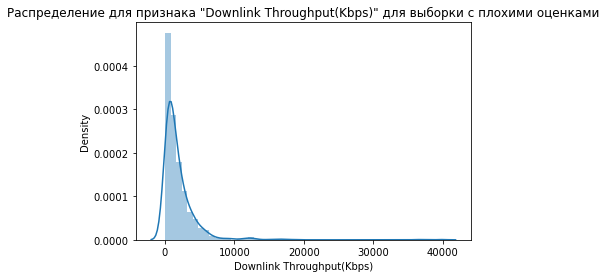

In [42]:
ax = sns.distplot(bad["Downlink Throughput(Kbps)"], bins=50)
ax.set_title(f'Распределение для признака "Downlink Throughput(Kbps)" для выборки с плохими оценками')
plt.show()

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


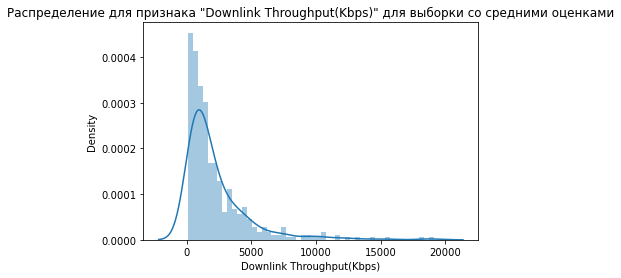

In [43]:
ax = sns.distplot(average["Downlink Throughput(Kbps)"], bins=50)
ax.set_title(f'Распределение для признака "Downlink Throughput(Kbps)" для выборки со средними оценками')
plt.show()

Так как число наблюдений у нас сильно различается для обоих случаев, воспользуемся алгоритмом бутстрепа

In [44]:
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

In [45]:
samples_bad = bootstrap(bad["Downlink Throughput(Kbps)"], N_TRIAL=1500)
samples_average = bootstrap(average["Downlink Throughput(Kbps)"], N_TRIAL=1500)

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


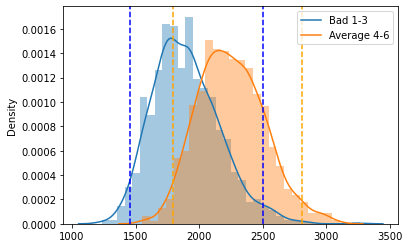

In [46]:
ax = sns.distplot(samples_bad, label = 'Bad')
sns.distplot(samples_average, ax = ax, label = 'Average')
ax.legend(['Bad 1-3','Average 4-6'])

ax.axvline(np.percentile(samples_bad, 2.5), linestyle='--', color='b')
ax.axvline(np.percentile(samples_bad, 97.5), linestyle='--', color='b')

ax.axvline(np.percentile(samples_average, 2.5), linestyle='--', color='orange')
ax.axvline(np.percentile(samples_average, 97.5), linestyle='--', color='orange')
plt.show()

Здесь видно, что доверительные интервалы у нас пересекаются, значит, статистически значимой разницы не наблюдается.

Далее пронаблюдаем разницу средних. Возьмём по 150 случайных значений из каждой выборки, посчитаем разницу между ними. Сделаем так 1000 раз и получим распределение разницы средних.

In [47]:
buf = []
for i in range(1000):
    fst_sample =  bad["Downlink Throughput(Kbps)"].sample(150)
    snd_sample =  average["Downlink Throughput(Kbps)"].sample(150)
    buf.append(np.mean(fst_sample) - np.mean(snd_sample))

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pct 2.5% = -807.12
pct 97.5% = 165.70


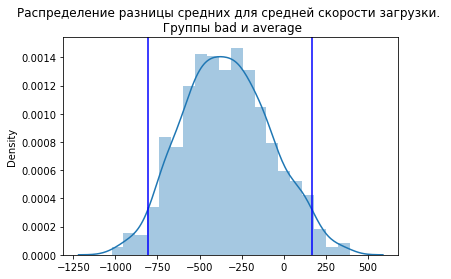

In [48]:
ax_buf = sns.distplot(buf)
ax_buf.set_title(f'Распределение разницы средних для средней скорости загрузки. \n Группы bad и average')
ax_buf.axvline(np.percentile(buf, 2.5), linestyle='-', color='b')
ax_buf.axvline(np.percentile(buf, 97.5), linestyle='-', color='b')
print(f'pct 2.5% = {np.percentile(buf, 2.5):.2f}\npct 97.5% = {np.percentile(buf, 97.5):.2f}')

Ноль входит в доверительный интервал, поэтому отвергнуть нулевую гипотезу о том, что скорость загрузки у групп **bad** и **average** статистически схожа, мы не можем. Скорее всего, более низкая оценка продиктована низким качеством голосовой связи.

Далее необходимо проверить метрики, на первый взгляд имеющие разные значения у групп **bad** и **perfect**.

### 2) Сравнение коэффициента повторной отправки пакетов у групп bad и perfect

H<sub>0</sub>: DTCPRR<sub>bad</sub> = DTCPRR<sub>perfect</sub>

В данном случае принимается нулевая гипотеза об отсутствии статистической разницы у групп **bad** и **perfect** в такой характеристике, как коэффициент повторной отправки пакетов.

In [49]:
bad["Downlink TCP Retransmission Rate(%)"].mean()

2.0915723873442005

In [50]:
perfect['Downlink TCP Retransmission Rate(%)'].mean()

1.649605142332414

In [51]:
perfect.shape

(1089, 11)

Размер выборки также слишком мал  и не равен размеру выборки **bad**.

Посмотрим распределения значений в разрезе 2 групп:

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


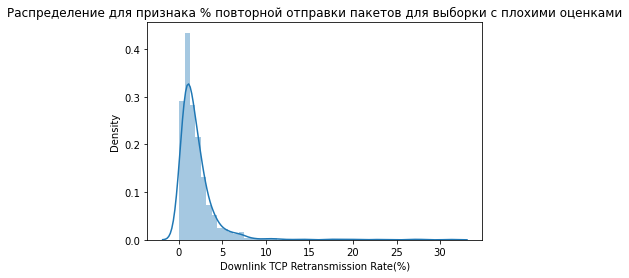

In [52]:
ax = sns.distplot(bad["Downlink TCP Retransmission Rate(%)"], bins=50)
ax.set_title(f'Распределение для признака % повторной отправки пакетов для выборки с плохими оценками')
plt.show()

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


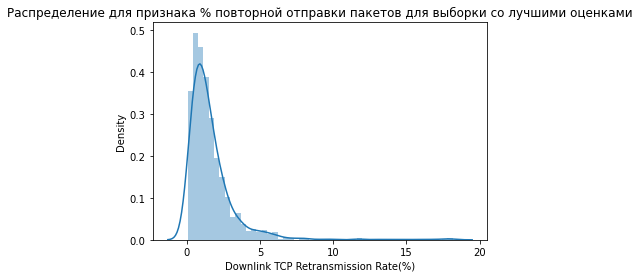

In [53]:
ax = sns.distplot(perfect["Downlink TCP Retransmission Rate(%)"], bins=50)
ax.set_title(f'Распределение для признака % повторной отправки пакетов для выборки со лучшими оценками')
plt.show()

Применим функцию бутстрепа:

In [54]:
samples_bad = bootstrap(bad["Downlink TCP Retransmission Rate(%)"], N_TRIAL=1500)
samples_perfect = bootstrap(perfect["Downlink TCP Retransmission Rate(%)"], N_TRIAL=1500)

Посмотрим распределения вместе с доверительными интервалами:

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


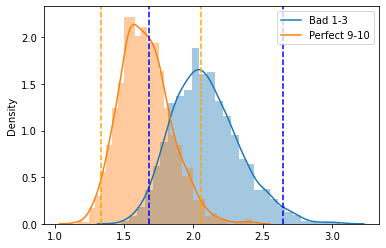

In [55]:
ax = sns.distplot(samples_bad, label = 'Bad')
sns.distplot(samples_perfect, ax = ax, label = 'Perfect')
ax.legend(['Bad 1-3', 'Perfect 9-10'])

ax.axvline(np.percentile(samples_bad, 2.5), linestyle='--', color='b')
ax.axvline(np.percentile(samples_bad, 97.5), linestyle='--', color='b')

ax.axvline(np.percentile(samples_perfect, 2.5), linestyle='--', color='orange')
ax.axvline(np.percentile(samples_perfect, 97.5), linestyle='--', color='orange')
plt.show()

Доверительные интервалы также пересекаются. Нельзя заявить о статистически значимой разнице в признаке.

In [56]:
buf = []
for i in range(1000):
    fst_sample =  bad["Downlink TCP Retransmission Rate(%)"].sample(150)
    snd_sample =  perfect["Downlink TCP Retransmission Rate(%)"].sample(150)
    buf.append(np.mean(fst_sample) - np.mean(snd_sample))

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pct 2.5% = -0.03
pct 97.5% = 0.88


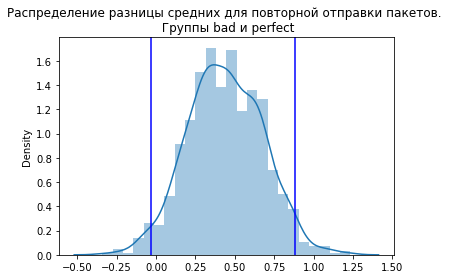

In [57]:
ax_buf = sns.distplot(buf)
ax_buf.set_title(f'Распределение разницы средних для повторной отправки пакетов. \n Группы bad и perfect')
ax_buf.axvline(np.percentile(buf, 2.5), linestyle='-', color='b')
ax_buf.axvline(np.percentile(buf, 97.5), linestyle='-', color='b')
print(f'pct 2.5% = {np.percentile(buf, 2.5):.2f}\npct 97.5% = {np.percentile(buf, 97.5):.2f}')

Ноль не входит в интервал, значит, нулевая гипотеза не подтвердилась, её следует отвергнуть и принять альтернативную <br> H<sub>1</sub>: DTCPRR<sub>bad</sub> > DTCPRR<sub>perfect</sub> <br>
Коэффициент повторной отправки пакетов для группы **perfect** статистически значимо ниже, чем для группы **bad**.

### 3) Сравнение величины задержки перед обработкой интернет-запроса у групп bad и perfect

H<sub>0</sub>: WATR<sub>bad</sub> = WATR<sub>perfect</sub>

В этой случае мы принимаем нулевую гипотеза об отсутствии статистической разницы у групп ***bad** и **perfect** в такой характеристике, как величина задержки перед обработкой интернет запроса.

In [58]:
bad["Web Average TCP RTT(ms)"].mean()

237.37488015340364

In [59]:
perfect["Web Average TCP RTT(ms)"].mean()

167.29568411386595

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


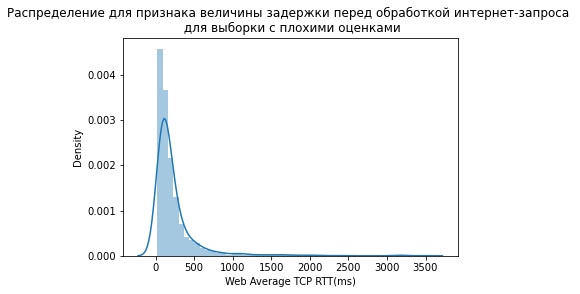

In [60]:
ax = sns.distplot(bad["Web Average TCP RTT(ms)"], bins=50)
ax.set_title(f'Распределение для признака величины задержки перед обработкой интернет-запроса \n для выборки с плохими оценками')
plt.show()

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


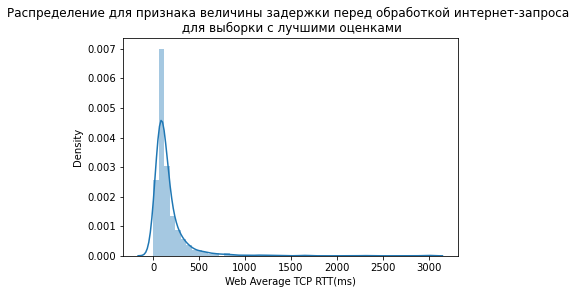

In [61]:
ax = sns.distplot(perfect["Web Average TCP RTT(ms)"], bins=50)
ax.set_title(f'Распределение для признака величины задержки перед обработкой интернет-запроса \n для выборки с лучшими оценками')
plt.show()

In [62]:
samples_bad = bootstrap(bad["Web Average TCP RTT(ms)"], N_TRIAL=1500)
samples_perfect = bootstrap(perfect["Web Average TCP RTT(ms)"], N_TRIAL=1500)

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


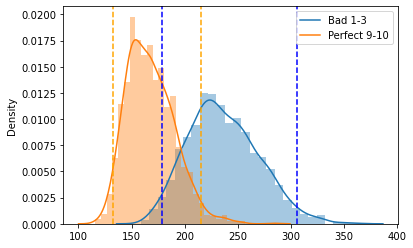

In [63]:
ax = sns.distplot(samples_bad, label = 'Bad')
sns.distplot(samples_perfect, ax = ax, label = 'Perfect')
ax.legend(['Bad 1-3', 'Perfect 9-10'])

ax.axvline(np.percentile(samples_bad, 2.5), linestyle='--', color='b')
ax.axvline(np.percentile(samples_bad, 97.5), linestyle='--', color='b')

ax.axvline(np.percentile(samples_perfect, 2.5), linestyle='--', color='orange')
ax.axvline(np.percentile(samples_perfect, 97.5), linestyle='--', color='orange')
plt.show()

In [64]:
buf = []
for i in range(1000):
    fst_sample =  bad["Web Average TCP RTT(ms)"].sample(150)
    snd_sample =  perfect["Web Average TCP RTT(ms)"].sample(150)
    buf.append(np.mean(fst_sample) - np.mean(snd_sample))

C:\Users\Sosipisos\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pct 2.5% = 10.61
pct 97.5% = 126.51


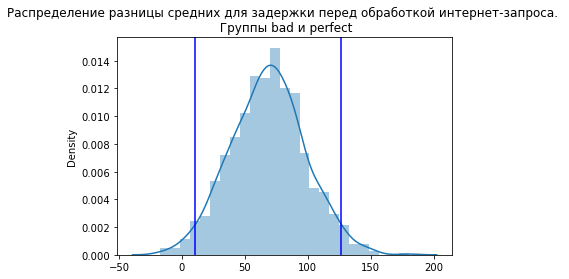

In [65]:
ax_buf = sns.distplot(buf)
ax_buf.set_title(f'Распределение разницы средних для задержки перед обработкой интернет-запроса. \n Группы bad и perfect')
ax_buf.axvline(np.percentile(buf, 2.5), linestyle='-', color='b')
ax_buf.axvline(np.percentile(buf, 97.5), linestyle='-', color='b')
print(f'pct 2.5% = {np.percentile(buf, 2.5):.2f}\npct 97.5% = {np.percentile(buf, 97.5):.2f}')

Ноль для этой метрики также не входит в интервал. <br> <br>
Нулевая гипотеза также не подтвердилась, её следует отвергнуть и принять альтернативную <br> H<sub>1</sub>: WATR<sub>bad</sub> > WATR<sub>perfect</sub> <br>
Задержка перед обработкой интернет-запроса для группы **bad** статистически значимо выше, чем для группы **perfect**.

### Выводы:

In [67]:
len(perfect) / len(df)

0.3518578352180937

In [68]:
len(bad) / len(df)

0.3369951534733441

35.2% пользователей полностью удовлетворены качеством связи, 33.7% полностью неудовлетворены качеством связи.

Основные причины недовольства - обрывы при звонках, плохое качество связи в зданиях, проблемы с мобильным интернетом.

У пользователей, поставивших низкую и среднюю оценку НЕ существует статистической разницы в скорости загрузки. Более низкая оценка, вероятно, продиктована совокупностью наличия проблем.

У пользователей, поставивших хорошую оценку наблюдается меньшее число одновременных проблем со связью.

У пользователей, поставивших отличную и плохую оценки существует статистическая разница в % переотправок пакетов данных и в задержке перед обработкой запроса. Таким образом, вероятно, именно эти показатели влияют на качество интернета.